In [8]:
# Slides for Probability and Statistics module, 2016-2017
# Matt Watkins, University of Lincoln

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Special Distributions

<div style="background-color:Gold; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 8px; padding-right: 8px; padding-top: 8px; border-radius: 25px;">
Define and use the properties of the major probability distributions:

<li> uniform  </li>
<li> binomial </li>
<li> geometric </li>
<li> poisson </li>
<li> exponential </li>
<li> normal </li>
</div>

- see examples where these distributions occur.

## Poisson distribution

**definition**
a random variable $X$ having a probability mass function of the form:
$$
p(x) = e^{-\mu}\frac{\mu^x}{x!}, 
$$
for $x = 0,1,2,\ldots$ and $\mu$ can take on any positive value, is said to have a Poisson distribution.

What does it look like?

![](poisson.png)

The [Poisson](https://en.wikipedia.org/wiki/Sim%C3%A9on_Denis_Poisson) distribution has a dubious history according to [wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution).

>History  
The distribution was first introduced by Siméon Denis Poisson (1781–1840) and published, together with his probability theory, in 1837 in his work Recherches sur la probabilité des jugements en matière criminelle et en matière civile ("Research on the Probability of Judgments in Criminal and Civil Matters"). The work theorized about the number of wrongful convictions in a given country by focusing on certain random variables N that count, among other things, the number of discrete occurrences (sometimes called "events" or "arrivals") that take place during a time-interval of given length. The result had been given previously by Abraham de Moivre (1711) in De Mensura Sortis seu; de Probabilitate Eventuum in Ludis a Casu Fortuito Pendentibus in Philosophical Transactions of the Royal Society, p. 219. This makes it an example of [Stigler's law](https://en.wikipedia.org/wiki/Stigler%27s_law_of_eponymy) and it has prompted some authors to argue that the Poisson distribution should bear the name of de Moivre.<br><br>
A practical application of this distribution was made by Ladislaus Bortkiewicz in 1898 when he was given the task of investigating the number of soldiers in the Prussian army killed accidentally by horse kicks; this experiment introduced the Poisson distribution to the field of reliability engineering.

Or more to the point, like the horse kicks, it describes the number of times an event that occurs infrequently in a given time period will occur.

- misprints on a page in a book
- errors in my lecture notes
- number of wrong telephone numbers dialled in a day
- number of $\alpha$-particles discharged in a fixed period of time from a radiocative nuclei

---

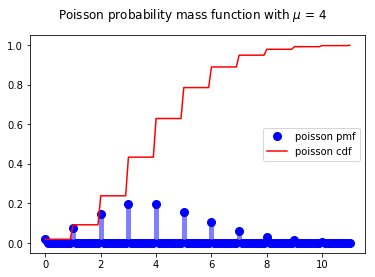

In [7]:
fig, ax = plt.subplots(1, 1)

mu = 4
fig.suptitle('Poisson probability mass function with $\mu$ = {}'.format(mu), fontsize=12)

x = np.arange(stats.poisson.ppf(0.001, mu),
              stats.poisson.ppf(0.999, mu))

x = np.linspace(int(stats.poisson.ppf(0.001, mu)),
                  int(stats.poisson.ppf(0.999, mu)),
                (int(stats.poisson.ppf(0.999, mu) - int(stats.poisson.ppf(0.001, mu))))*10+1)

ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf');
ax.plot(x, stats.poisson.cdf(x, mu), 'r-', ms=8, label='poisson cdf');
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5);
ax.legend(loc='center right');
plt.savefig('poisson.png')

#### Check it is a valid probability mass function

We have that 
$$
\begin{align}
\sum_{\text{all $x$}} p(x) & = \sum_{x=0}^{\infty} e^{-\mu}\frac{\mu^x}{x!} \\
                           & = e^{-\mu} \sum_{x=0}^{\infty} \frac{\mu^x}{x!} \\
                           & =e^{-\mu} e^{\mu} \\
                           & = 1
\end{align}
$$

as required. We use the series definition of the exponential function in the next to last step.

We've not dealt with discrete variables with infinite numbers of outcomes - as far as we are concerned, they are OK as long as all properties and probabilities that we need to calculate converge as $x \to \infty$.

### Expectation and variance of a Poisson distributed random variable.

If $X$ has $p_X(x) = e^{-\mu}\frac{\mu^x}{x!}$

- $\text{E}[X] = \mu$
- $\sigma_X^2 = \mu$


#### Proof of expectation of Poisson distributed random variable

$$
\begin{align}
\text{E}[X] & = \sum_{x=0}^{\infty} x e^{-\mu}\frac{\mu^x}{x!} \\
            & = \sum_{x=1}^{\infty} x e^{-\mu}\frac{\mu^x}{x!} \\
            & = e^{-\mu} \sum_{x=1}^{\infty} \frac{\mu^x}{(x-1)!} \\
            & = \mu e^{-\mu} \sum_{x=1}^{\infty} \frac{\mu^{(x-1)}}{(x-1)!}
\end{align}
$$

then we substitute $y = x -1$
$$
\begin{align}
            & = \mu e^{-\mu} \sum_{y=0}^{\infty} \frac{\mu^y}{(y)!} \\
            & = \mu e^{-\mu} e^{\mu} \\
            &= \mu
\end{align}
$$

#### Proof of variance of Poisson distributed random variable

$$
\begin{align}
\text{E}(X^2) & = \sum_{x=0}^{\infty} x^2 e^{-\mu}\frac{\mu^x}{x!} \\
              & = \sum_{x=1}^{\infty} (x(x-1)-x) e^{-\mu}\frac{\mu^x}{x!} \\
              & = \sum_{x=2}^{\infty} x(x-1) e^{-\mu} \frac{\mu^x}{x!} + \sum_{x=1}^{\infty} x e^{-\mu} \frac{\mu^x}{x!} \\
              & = \mu^2 e^{-\mu} \sum_{x=2}^{\infty} \frac{\mu^{(x-2)}}{(x-2)!} + \text{E}[X] \\
              & = \mu^2 + \mu
\end{align}
$$

where we substitute in $y = x-2$, similarly to the expectation value. 

Then identify the sum as an exponential function.

We then get that
$$
\begin{align}
\sigma_X^2 & = \text{E}[X^2] - \text{E}[X]^2 \\
              & = \mu^2 + \mu - \mu^2 \\
              &= \mu
\end{align}
$$


## When is it used?

If an event with a low probability of occurence at any instant is known:
- to occur randomly, and
- to have a mean number of occurences $\mu$ in a given time (or space) interval has a Poisson distribution (approximately) with parameter $\mu$.

---

**example**

Goverment statistic for a certain country show that the average number of major industrial accidents per year for large firms is 1.1 per 5000 employees. Find the probability that there will be at least one major accident per year for  firm with:

- 5000 employees
- 10000 employees

### Solution  

Here we have a unit scale of 5000 employees and we are given the average accident rate per year is 1.1 per 5000 employees. 

This should satisfy our criteria to be Poisson distributed - the accidents are rare and randomness should be a reasonable assumption. 

Then we have a Poisson distribution with $\mu = 1.1$ in the interval of interest (1 year). So
$$
P(X \ge 1) = 1 - p(0) = 1 - e^{-1.1} \frac{1.1^0}{0!} = 0.6671
$$
- Now we have a new scale of 10000 employees. If the accidents are rare, independent and random we'd then expect 2.2 accidents per year in a firm with 10000 employees. So
$$
P(X \ge 1) = 1 - p(0) = 1 - e^{-2.2} \frac{2.2^0}{0!} = 0.8892
$$

So it is bad to work for a big firm?


## Approximation to binomial distribution

One way to see how it can occur is to see how it can approximate a binomial distribution if $n$ is large and $p$ small.  

Recall that
$$
P(X=x) = {n \choose x}p^x(1-p)^{n-x}, (x=0,1,\ldots,n-1,n)
$$
for a binomially distributed random variable.

So if $X$ is a binomially distributed random variable with parameters ($n, p$). If we let $\mu = np$  
$$
\begin{align}
P(X=x) &= {n \choose x}p^x(1-p)^{n-x} \\
       &= \frac{n! }{(n-x)!x!} p^x(1-p)^{n-x} \\
       &= \frac{n! }{(n-x)!x!} \frac{\mu}{n}^x \Big(1-\frac{\mu}{n}\Big)^{n-x} \\
       &= \frac{n(n-1)\cdots(n-x+1)}{n^x}\frac{\mu^x}{x!}\frac{\Big(1-\frac{\mu}{n}\Big)^n}{\Big(1-\frac{\mu}{n}\Big)^x}
\end{align}
$$
Now for large $n$ and small $p$ we can make the approximations
$$
\begin{align}
\Big(1-\frac{\mu}{n}\Big)^n & \approx e^{-\mu}, \\
\frac{n(n-1)\cdots(n-x+1)}{n^x} & \approx 1, \\
\Big(1-\frac{\mu}{n}\Big)^x & \approx 1
\end{align}
$$
Then we get that 
$$
P(X=x) \approx e^{-\mu} \frac{\mu^x}{x!}
$$

## Geometric Distribution

A discrete random variable $X$ with probability mass function $p(x)$ of the form:
$$
P(X=x) = p(x) = (1-p)^x p 
$$
with $0 \le p \le 1$ is said to have a geometric distribution. 

(This is not dissimilar to Q2 of assignment 1, or problem 6 of problem class 1.)

(Aside, The use of $p$ as the probability of success of individual attempts seems quite common, don't confuse it with the probability mass function (which is a function and should have an argument).)

You can prove that it is a valid probability mass function by noting that the sum over all $x$ is a geometric progression that can be summed up immediately (see this week's problem class).

We just give the expectation and variance here for completeness.

---

- $\text{E}[X] = \frac{1-p}{p}$
- $\text{var}(X) = \frac{1-p}{p^2}$

---

This distribution can be a bit ugly because different people define things a little differently: 

- Some define the variable as the number of experiments until we obtain a success, we get $E(X)=1/p$. 
- Others talk about the expected number of failures before a success, $E(X) = (1-p)/p$.



##### **example**

What is the expected number of rolls of a fair die to obtain a 1?

Here we formulate the question as the total number of experiments until we get a success. So we have $\text{E}[X]=\frac{1}{\frac{1}{6}}=6$.

If it had been phrased as the number of rolls before we get the 1 we'd have
$\text{E}[X]=\frac{1-\frac{1}{6}} {\frac{1}{6}} =5$.

## Exponential distribution

An exponential random variable is has pdf

$$
\begin{align}
f_Y(y) & = \beta e^{-\beta y}, \hfill y > 0 \\
       & = 0 \text{ otherwise:}
\end{align}
$$

Lets find the expectation and variance using the moment generating function of $Y$.

The moment generating function of $Y$ is 
$$
\begin{align}
m_Y(t) & = \text{E}[e^{tY}]\\
       & = \int_0^{\infty} e^{ty} \beta e^{- \beta y} \text{d}y\\
       & = \int_0^{\infty} \beta e^{-y(\beta-t)} \text{d}y\\
       & = \frac{\beta}{\beta-t}
\end{align}
$$

to find the moments we take the derivative with respect to $t$ then set $t = 0$

$$
\mu_Y = m^{(1)}(0) = \beta ^{-1}
$$

$$
m_2 = m^{(2)}(0) = 2 \beta^{-2}
$$

so 

$$
\sigma_Y^2 = m_2 - \mu^2 = \beta^{-2}
$$

# Summary of part 2

We've looked at several of the important probability distribution/mass functions that occur in probability and statistics.

- Poisson
- Geometric
- Exponential